## Supervised linear regression

Voor het product: 45 over het komende jaar

In [399]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
database = {'servername': 'localhost\SQLEXPRESS',
            'database': 'DATAWAREHOUSE'}
format = '%d-%m-%Y'

conn_str = ('DRIVER={SQL Server};'
            f'SERVER={database["servername"]};'
            f'DATABASE={database["database"]};'
            'Trusted_Connection=yes')

query = "SELECT * FROM dbo.sales_order"

#inladen naar df
try:
    with pyodbc.connect(conn_str) as conn:
        product_df = pd.read_sql_query(query, conn)
except Exception as e:
    print(f"An error occurred: {e}")


<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\459806266.py:8: SyntaxWarning: invalid escape sequence '\S'
  database = {'servername': 'localhost\SQLEXPRESS',
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\459806266.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_df = pd.read_sql_query(query, conn)


In [400]:
# opsplitsen naar verschillende df's

orders_from_nw = product_df[product_df['product_id'].str.contains('NW')]
orders_from_aenc = product_df[product_df['product_id'].str.contains('AC')]
orders_from_aw = product_df[product_df['product_id'].str.contains('AW')]

orders_from_aenc


,S_KEY,id,line_id,unit_price,quantity,freight,sub_total,tax_amt,total_due,revenue,...,product_size_unit_measure_code,product_weight_unit_measure_code,product_vendor_country,product_vendor_city,product_vendor_postal_code,product_vendor_address,product_vendor_name,product_color,product_quantity,change_date
0,11,2001,1,9.0,12,NaN,108.0,NaN,108.0,108.0,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00\x07\xe1'
1,12,2001,2,14.0,12,NaN,168.0,NaN,168.0,168.0,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00\x07\xe2'
2,13,2001,3,14.0,12,NaN,168.0,NaN,168.0,168.0,...,None,None,None,None,None,None,None,Black,72,b'\x00\x00\x00\x00\x00\x00\x07\xe3'
3,14,2002,1,9.0,24,NaN,216.0,NaN,216.0,216.0,...,None,None,None,None,None,None,None,Black,92,b'\x00\x00\x00\x00\x00\x00\x07\xe4'
4,15,2002,2,10.0,24,NaN,240.0,NaN,240.0,240.0,...,None,None,None,None,None,None,None,White,12,b'\x00\x00\x00\x00\x00\x00\x07\xe5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1006,2587,1,9.0,36,NaN,324.0,NaN,324.0,324.0,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00\x0b\xc8'
996,1007,2587,2,14.0,36,NaN,504.0,NaN,504.0,504.0,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00\x0b\xc9'
997,1008,2588,1,9.0,24,NaN,216.0,NaN,216.0,216.0,...,None,None,None,None,None,None,None,Black,92,b'\x00\x00\x00\x00\x00\x00\x0b\xca'
998,1009,2588,2,10.0,24,NaN,240.0,NaN,240.0,240.0,...,None,None,None,None,None,None,None,White,12,b'\x00\x00\x00\x00\x00\x00\x0b\xcb'


In [401]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

product_df

,S_KEY,id,line_id,unit_price,quantity,freight,sub_total,tax_amt,total_due,revenue,...,product_size_unit_measure_code,product_weight_unit_measure_code,product_vendor_country,product_vendor_city,product_vendor_postal_code,product_vendor_address,product_vendor_name,product_color,product_quantity,change_date
0,11,2001,1,9.00,12,NaN,108.00,NaN,108.00,108.00,...,None,None,None,None,None,None,None,White,18,b'\x00\x00\x00\x00\x00\x00\x07\xe1'
1,12,2001,2,14.00,12,NaN,168.00,NaN,168.00,168.00,...,None,None,None,None,None,None,None,Orange,39,b'\x00\x00\x00\x00\x00\x00\x07\xe2'
2,13,2001,3,14.00,12,NaN,168.00,NaN,168.00,168.00,...,None,None,None,None,None,None,None,Black,72,b'\x00\x00\x00\x00\x00\x00\x07\xe3'
3,14,2002,1,9.00,24,NaN,216.00,NaN,216.00,216.00,...,None,None,None,None,None,None,None,Black,92,b'\x00\x00\x00\x00\x00\x00\x07\xe4'
4,15,2002,2,10.00,24,NaN,240.00,NaN,240.00,240.00,...,None,None,None,None,None,None,None,White,12,b'\x00\x00\x00\x00\x00\x00\x07\xe5'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3006,10624,NW_29,123.79,6,94.8,837.54,NaN,837.54,837.54,...,None,None,Germany,Frankfurt,60439,Bogenallee 51,Plutzer Lebensmittelgroßmärkte AG,None,0,b'\x00\x00\x00\x00\x00\x00\x13\xa3'
2996,3007,10624,NW_44,19.45,10,94.8,289.30,NaN,289.30,289.30,...,None,None,Singapore,Singapore,0512,"471 Serangoon Loop, Suite #402",Leka Trading,None,27,b'\x00\x00\x00\x00\x00\x00\x13\xa4'
2997,3008,10625,NW_14,23.25,3,43.9,113.65,NaN,113.65,113.65,...,None,None,Japan,Osaka,545,92 Setsuko Chuo-ku,Mayumi's,None,35,b'\x00\x00\x00\x00\x00\x00\x13\xa5'
2998,3009,10625,NW_42,14.00,5,43.9,113.90,NaN,113.90,113.90,...,None,None,Singapore,Singapore,0512,"471 Serangoon Loop, Suite #402",Leka Trading,None,26,b'\x00\x00\x00\x00\x00\x00\x13\xa6'


# NW

In [402]:
import pandas as pd

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_nw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Bekijk het bijgewerkte DataFrame
sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()
sorted_orders


# Converteer maandnummers naar numerieke waarden
# sorted_orders['order_date_month'] = pd.to_numeric(sorted_orders['order_date_month'])

# # Sorteer op jaar en maand
# sorted_orders = sorted_orders.sort_values(by=['order_date_year', 'order_date_month'])

# # Rest van de code blijft hetzelfde
orders = sorted_orders['order_count']
dates = sorted_orders['year_month']
# months = sorted_orders['order_date_month']

# column_names = [str(years[x]) + '-' + str(months[x]) for x in range(len(years))]
values_dict = {dates[x]: orders[x] for x in range(len(orders))}
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict
#df = pd.DataFrame(values_dict)
#df
# De DataFrame met oplopende maanden
#df


,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08
0,59,69,57,73,66,81,85,79,77,81,96,76,77,24


In [403]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_nw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Verwijder de oorspronkelijke kolom 'order_date'
sorted_orders.drop(['order_date'], axis=1, inplace=True)

# Groepeer op jaar en maand en bereken de som van bestellingen per maand
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'}).reset_index()

# Train het ARIMA-model
p, d, q = 1, 1, 1  # Dit zijn de ARIMA-parameters
model = ARIMA(sorted_orders['order_count'], order=(p, d, q))
model_fit = model.fit()

# Voorspel toekomstige waarden
forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('1997-09'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

# Maak een DataFrame voor de toekomstige voorspellingen
future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})

# Voeg de voorspelde waarden toe aan het DataFrame
sorted_orders = pd.concat([sorted_orders, future_forecast_df])

# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}

# Bekijk het bijgewerkte DataFrame met voorspellingen
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict


c:\Users\danny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\1621507465.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('1997-09'), periods=forecast_steps, freq='M')
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\1621507465.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.

,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09
0,59,69,57,73,66,81,85,79,77,81,96,76,77,24,46


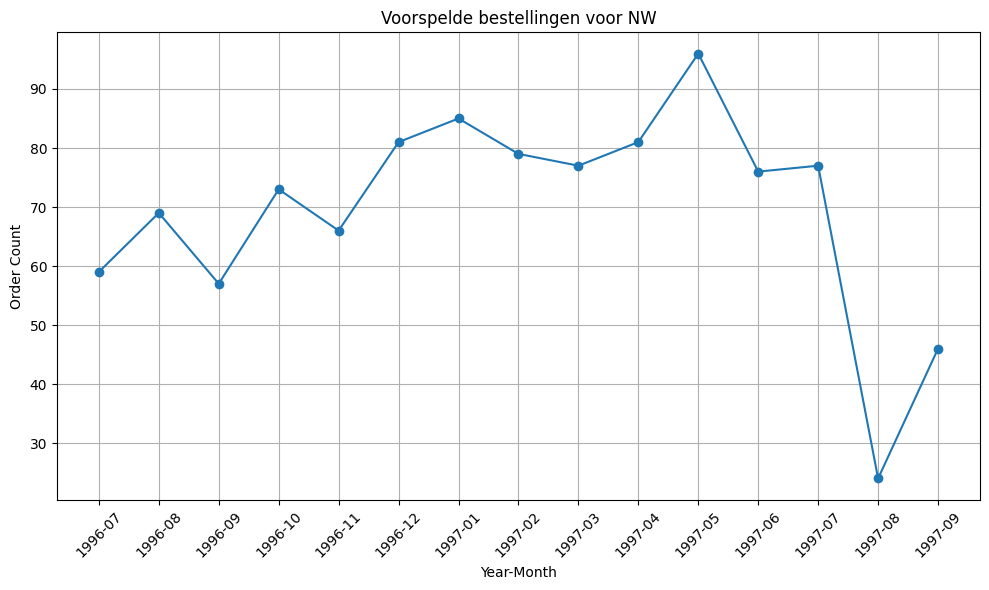

In [404]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor NW')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2

#aenc

In [405]:
import pandas as pd

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_nw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Bekijk het bijgewerkte DataFrame
sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()
sorted_orders


# Converteer maandnummers naar numerieke waarden
# sorted_orders['order_date_month'] = pd.to_numeric(sorted_orders['order_date_month'])

# # Sorteer op jaar en maand
# sorted_orders = sorted_orders.sort_values(by=['order_date_year', 'order_date_month'])

# # Rest van de code blijft hetzelfde
orders = sorted_orders['order_count']
dates = sorted_orders['year_month']
# months = sorted_orders['order_date_month']

# column_names = [str(years[x]) + '-' + str(months[x]) for x in range(len(years))]
values_dict = {dates[x]: orders[x] for x in range(len(orders))}
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict
#df = pd.DataFrame(values_dict)
#df
# De DataFrame met oplopende maanden
#df


,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08
0,59,69,57,73,66,81,85,79,77,81,96,76,77,24


In [406]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_aenc.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Verwijder de oorspronkelijke kolom 'order_date'
sorted_orders.drop(['order_date'], axis=1, inplace=True)

# Groepeer op jaar en maand en bereken de som van bestellingen per maand
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'}).reset_index()
sorted_orders

#sorted_orders = sorted_orders.drop(columns=['1997-08'])
# Train het ARIMA-model
p, d, q = 1, 1, 1  # Dit zijn de ARIMA-parameters
model = ARIMA(sorted_orders['order_count'], order=(p, d, q))
model_fit = model.fit()

# Voorspel toekomstige waarden
forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('1997-08'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

# Maak een DataFrame voor de toekomstige voorspellingen
future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})

# Voeg de voorspelde waarden toe aan het DataFrame
sorted_orders = pd.concat([sorted_orders, future_forecast_df])

# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}

# Bekijk het bijgewerkte DataFrame met voorspellingen
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict


C:\Users\danny\AppData\Local\Temp\ipykernel_15040\570172231.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('1997-08'), periods=forecast_steps, freq='M')
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\570172231.py:40: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})


,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08
0,59,69,57,73,66,81,85,79,77,81,96,76,77,21


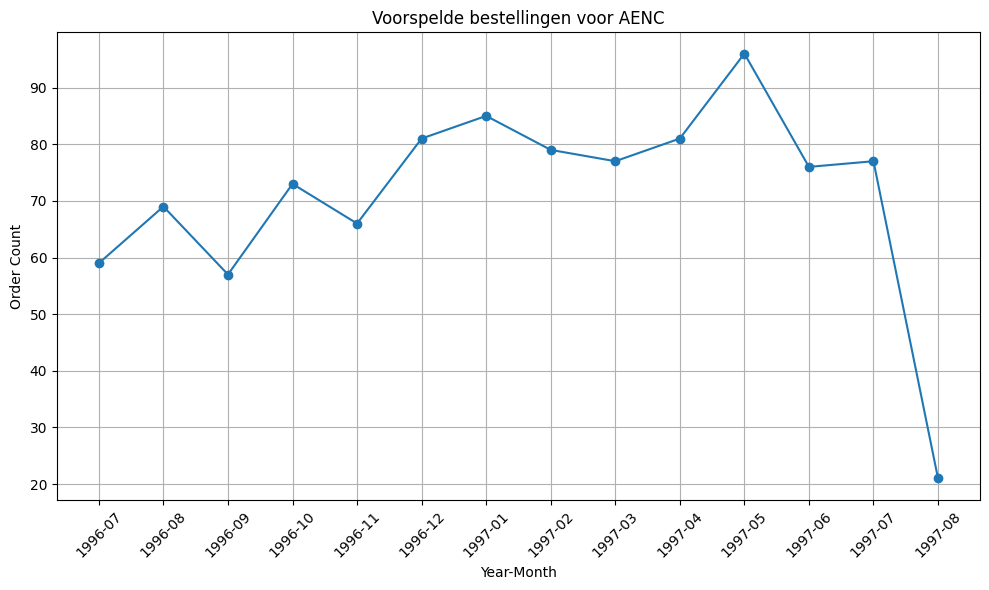

In [407]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor AENC')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#aw

In [408]:
import pandas as pd

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_aw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Bekijk het bijgewerkte DataFrame
sorted_orders.drop(['order_date'], axis=1, inplace=True)
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'})
sorted_orders =  sorted_orders.reset_index()
sorted_orders


# Converteer maandnummers naar numerieke waarden
# sorted_orders['order_date_month'] = pd.to_numeric(sorted_orders['order_date_month'])

# # Sorteer op jaar en maand
# sorted_orders = sorted_orders.sort_values(by=['order_date_year', 'order_date_month'])

# # Rest van de code blijft hetzelfde
orders = sorted_orders['order_count']
dates = sorted_orders['year_month']
# months = sorted_orders['order_date_month']

# column_names = [str(years[x]) + '-' + str(months[x]) for x in range(len(years))]
values_dict = {dates[x]: orders[x] for x in range(len(orders))}
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict
#df = pd.DataFrame(values_dict)
#df
# De DataFrame met oplopende maanden
#df


,2011-05,2011-06,2011-07
0,357,141,502


In [409]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def extract_year_month(df, date_column):
    """
    Deze functie neemt een DataFrame en de naam van de kolom met datums.
    Het voegt een nieuwe kolom toe aan het DataFrame genaamd 'year_month',
    die het jaar en de maand van elke datum combineert in het formaat "YYYY-MM".
    """
    df['year_month'] = df[date_column].dt.strftime('%Y-%m')
    return df

# Voorbeeldgebruik:
# Groupby en sorteren
grouped_orders = orders_from_aw.groupby(['order_date']).agg({'id': 'count'})
sorted_orders = grouped_orders.reset_index().rename(columns={'id': 'order_count'})

# Pas de extract_year_month functie toe
sorted_orders = extract_year_month(sorted_orders, 'order_date')

# Verwijder de oorspronkelijke kolom 'order_date'
sorted_orders.drop(['order_date'], axis=1, inplace=True)

# Groepeer op jaar en maand en bereken de som van bestellingen per maand
sorted_orders = sorted_orders.groupby(['year_month']).agg({'order_count': 'sum'}).reset_index()

# Train het ARIMA-model
p, d, q = 1, 1, 1  # Dit zijn de ARIMA-parameters
model = ARIMA(sorted_orders['order_count'], order=(p, d, q))
model_fit = model.fit()

# Voorspel toekomstige waarden
forecast_steps = 1
future_dates = pd.date_range(start=pd.to_datetime('2011-08'), periods=forecast_steps, freq='M')
future_forecast = model_fit.forecast(steps=forecast_steps)

# Maak een DataFrame voor de toekomstige voorspellingen
future_forecast_df = pd.DataFrame({'year_month': future_dates.strftime('%Y-%m'), 'order_count': int(future_forecast)})

# Voeg de voorspelde waarden toe aan het DataFrame
sorted_orders = pd.concat([sorted_orders, future_forecast_df])

# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
# Update values_dict met de voorspelde waarden
values_dict = {**values_dict, **{future_forecast_df.iloc[i]['year_month']: future_forecast_df.iloc[i]['order_count'] for i in range(len(future_forecast_df))}}

# Bekijk het bijgewerkte DataFrame met voorspellingen
values_dict = pd.DataFrame(values_dict, index=[0])
values_dict


c:\Users\danny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\danny\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\3679134009.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime('2011-08'), periods=forecast_steps, freq='M')
C:\Users\danny\AppData\Local\Temp\ipykernel_15040\3679134009.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a Ty

,2011-05,2011-06,2011-07,2011-08
0,357,141,502,229


grafiekje bruv

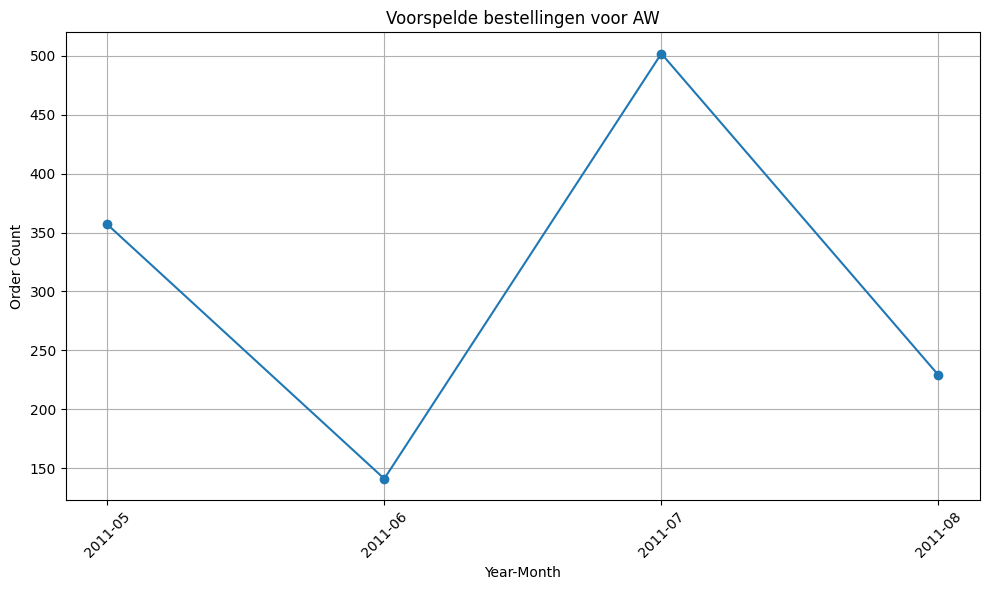

In [410]:
import matplotlib.pyplot as plt

# Gegevens
dates = values_dict.columns
order_counts = values_dict.values[0]

# Maak de plot
plt.figure(figsize=(10, 6))
plt.plot(dates, order_counts, marker='o', linestyle='-')
plt.title('Voorspelde bestellingen voor AW')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
